# Lab 02: K-Nearest Neighbors (KNN) Classification

## Learning Objectives

By the end of this lab, you will be able to:

1. Understand the K-Nearest Neighbors algorithm for classification and regression
2. Identify the key components needed for KNN (distance metric, k value, weighting, aggregation)
3. Understand the bias-variance tradeoff and its relationship to the k parameter
4. Recognize overfitting and underfitting in ML models
5. Apply cross-validation techniques for model evaluation
6. Implement KNN using scikit-learn on various datasets

---

## 1. The K-Nearest Neighbors (KNN) Algorithm

KNN is an **instance-based** (or memory-based) supervised learning algorithm. It makes predictions based on the similarity to existing training examples.

### How KNN Works

Given a training set `X_train` with labels `y_train`, and a new instance `x_test` to be classified:

```
┌────────────────────────────────────────────────────────────────┐
│                    KNN Algorithm Steps                         │
├────────────────────────────────────────────────────────────────┤
│                                                                │
│  Step 1: Find the K most similar instances (X_NN) to x_test   │
│          from the training set X_train                         │
│                           │                                    │
│                           ▼                                    │
│  Step 2: Get the labels (y_NN) for the K nearest neighbors    │
│                           │                                    │
│                           ▼                                    │
│  Step 3: Predict label by combining y_NN                       │
│          (e.g., majority vote for classification)              │
│                                                                │
└────────────────────────────────────────────────────────────────┘
```

### Visual Example

```
        Feature Space
        
    │
    │    ○ ○         ○ = Class A
    │  ○   ○         ● = Class B
    │    ◆ ←──── Query point
    │  ●   ●
    │    ● ●
    │
    └─────────────────
    
    With k=3: 2 neighbors are ●, 1 is ○
    → Prediction: Class B (majority vote)
```

---

## 2. Four Things KNN Needs

```
┌─────────────────────────────────────────────────────────────────────┐
│                    KNN Required Components                          │
├─────────────────────────────────────────────────────────────────────┤
│                                                                     │
│  1. DISTANCE METRIC                                                 │
│     └─ How to measure similarity between instances                  │
│        • Euclidean (most common)                                    │
│        • Manhattan                                                  │
│        • Minkowski                                                  │
│                                                                     │
│  2. NUMBER OF NEIGHBORS (K)                                         │
│     └─ How many nearest neighbors to look at                        │
│        • Small k: More complex boundary, risk of overfitting        │
│        • Large k: Smoother boundary, risk of underfitting           │
│                                                                     │
│  3. WEIGHTING FUNCTION (Optional)                                   │
│     └─ How to weight neighbor contributions                         │
│        • Uniform: All neighbors have equal weight                   │
│        • Distance: Closer neighbors have more influence             │
│                                                                     │
│  4. AGGREGATION METHOD                                              │
│     └─ How to combine neighbor labels                               │
│        • Classification: Majority vote                              │
│        • Regression: Average/weighted average                       │
│                                                                     │
└─────────────────────────────────────────────────────────────────────┘
```

---

## 3. Bias-Variance Tradeoff

Understanding the bias-variance tradeoff is crucial for selecting the right value of k.

### Bias

> **Definition**: The difference between the prediction of the values by the ML model and the correct value.

- **High Bias** = Large error in training AND testing data → Model **underfits**
- The model is too simple to capture the underlying patterns

### Variance

> **Definition**: The variability of model prediction for a given data point, which tells us the spread of our data.

- **High Variance** = Model performs well on training data but poorly on test data → Model **overfits**
- The model is too complex and captures noise in the training data

### Effect of K on Bias-Variance

```
    Bias-Variance vs. K Value
    
    Error
    │
    │\                    
    │ \   Variance       
    │  \                 ___________
    │   \___________    /
    │              \   /  Bias
    │               \_/
    │             Optimal K
    │
    └────────────────────────────► K
        Small k          Large k
        (Overfitting)    (Underfitting)
```

| Small k (e.g., k=1) | Large k |
|---------------------|------|
| Low bias, high variance | High bias, low variance |
| Complex, detailed decision boundary | Smooth, simple decision boundary |
| Sensitive to noise | Less sensitive to noise |
| Risk of **overfitting** | Risk of **underfitting** |

---

## 4. Generalization, Overfitting, and Underfitting

### Generalization

> **Generalization ability** refers to an algorithm's ability to give accurate predictions for new, previously unseen data.

### Understanding with KNN

**For k = 1:**
- Only the closest point is considered
- Prediction might be accurate for that specific point (low bias)
- High variance: doesn't account for other possible points
- **Result**: Overfitting

**For higher values of k:**
- Many points closer to the query are considered
- Higher bias: can't learn specifics from the training set
- Lower variance: more stable predictions
- **Result**: May underfit

```
┌──────────────────────────────────────────────────────────────────┐
│              Model Complexity Spectrum                           │
├──────────────────────────────────────────────────────────────────┤
│                                                                  │
│   Underfitting         Good Fit          Overfitting            │
│   (High Bias)          (Balanced)        (High Variance)        │
│                                                                  │
│   ─────────            ─────────          ─────────             │
│   |       |            |  ╱╲   |          |╱╲_/╲  |             │
│   |───────|            | /  ╲  |          |      ╲|             │
│   |       |            |/    ╲ |          |       |             │
│   ─────────            ─────────          ─────────             │
│                                                                  │
│   Too simple           Just right         Too complex           │
│   Large K              Optimal K          Small K               │
│                                                                  │
└──────────────────────────────────────────────────────────────────┘
```

---

## 5. Supervised Machine Learning Workflow

### Feature Representation

```
    ┌─────────────────────────────────────────┐
    │         Data Representation             │
    ├─────────────────────────────────────────┤
    │                                         │
    │   X: Data instances/samples/examples    │
    │      └─ Features used for prediction    │
    │                                         │
    │   y: Target value                       │
    │      └─ What we want to predict         │
    │                                         │
    └─────────────────────────────────────────┘
```

### Model/Estimator

A **Model (Estimator)** is the result of model fitting. Training is the process of estimating model parameters from the data.

```python
# Scikit-learn pattern
model = ModelClass()          # Create model
model.fit(X_train, y_train)   # Train model
predictions = model.predict(X_test)  # Make predictions
score = model.score(X_test, y_test)  # Evaluate model
```

---

## 6. Hands-On: KNN Classification

Let's implement KNN classification on different datasets.

In [1]:
# Import required libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification, make_blobs

print("Libraries imported successfully!")

Libraries imported successfully!


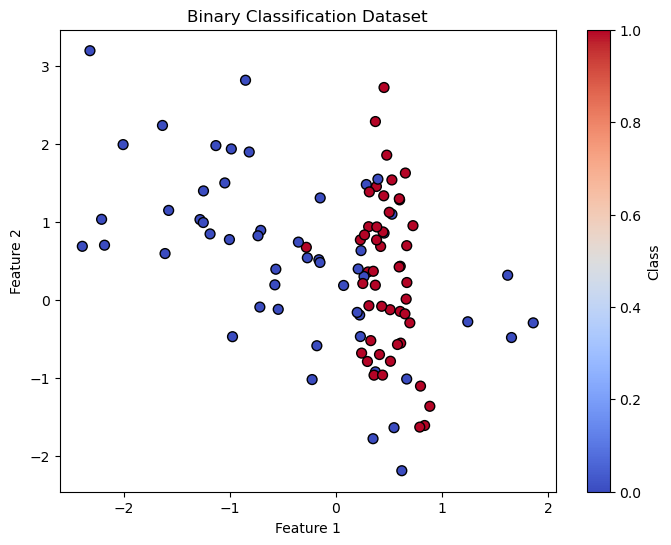

In [2]:
# Create a synthetic binary classification dataset
X_C2, y_C2 = make_classification(
    n_samples=100, 
    n_features=2,
    n_redundant=0, 
    n_informative=2,
    n_clusters_per_class=1, 
    flip_y=0.1,
    class_sep=0.5, 
    random_state=0
)

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2, cmap='coolwarm', edgecolors='black', s=50)
plt.title('Binary Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.show()

In [3]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

Training samples: 75
Test samples: 25


In [4]:
# Function to visualize KNN decision boundary
def plot_knn_decision_boundary(X, y, k, ax=None):
    """Plot KNN decision boundary."""
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    
    # Train KNN classifier
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)
    
    # Create mesh grid
    h = 0.02  # Step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict for each point in mesh
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='black', s=50)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(f'KNN with k={k}')
    
    return clf

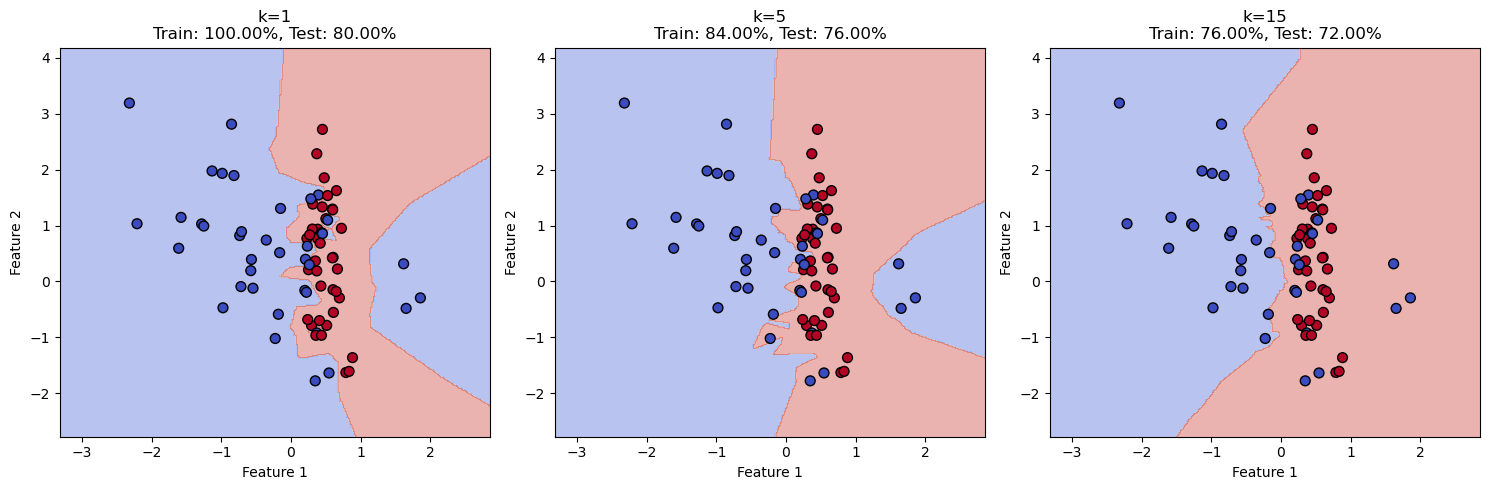

In [5]:
# Compare different values of k
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

k_values = [1, 5, 15]

for ax, k in zip(axes, k_values):
    clf = plot_knn_decision_boundary(X_train, y_train, k, ax)
    
    # Calculate accuracies
    train_acc = clf.score(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    ax.set_title(f'k={k}\nTrain: {train_acc:.2%}, Test: {test_acc:.2%}')

plt.tight_layout()
plt.show()

### Observations

- **k=1**: Very complex, jagged decision boundary (overfitting)
- **k=5**: Balanced decision boundary
- **k=15**: Smoother, simpler boundary (may underfit)

---

## 7. KNN for Regression

KNN can be used not only for classification but also for **regression** tasks.

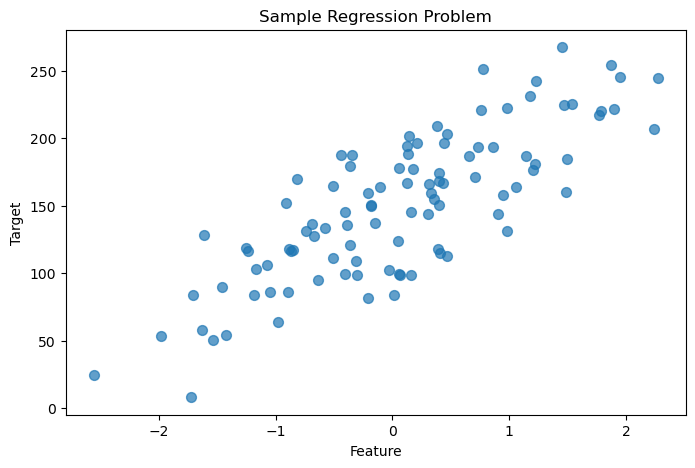

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression

# Create synthetic regression data
X_R1, y_R1 = make_regression(
    n_samples=100, 
    n_features=1,
    n_informative=1, 
    bias=150.0,
    noise=30, 
    random_state=0
)

# Visualize the data
plt.figure(figsize=(8, 5))
plt.scatter(X_R1, y_R1, marker='o', s=50, alpha=0.7)
plt.title('Sample Regression Problem')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

In [7]:
# Split the data
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_R1, y_R1, random_state=0)

# Train KNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_r, y_train_r)

# Evaluate
print("KNN Regression Results (k=5):")
print(f"R² score (training): {knn_reg.score(X_train_r, y_train_r):.3f}")
print(f"R² score (test): {knn_reg.score(X_test_r, y_test_r):.3f}")

KNN Regression Results (k=5):
R² score (training): 0.745
R² score (test): 0.425


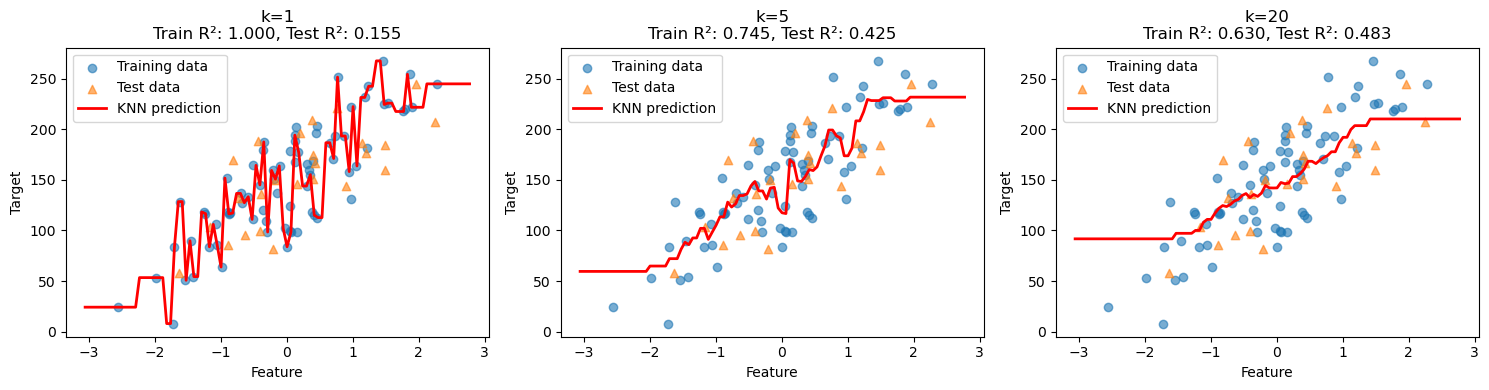

In [8]:
# Visualize KNN regression for different k values
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

X_plot = np.linspace(X_R1.min() - 0.5, X_R1.max() + 0.5, 100).reshape(-1, 1)
k_values = [1, 5, 20]

for ax, k in zip(axes, k_values):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_r, y_train_r)
    
    y_plot = knn.predict(X_plot)
    
    ax.scatter(X_train_r, y_train_r, label='Training data', alpha=0.6)
    ax.scatter(X_test_r, y_test_r, label='Test data', alpha=0.6, marker='^')
    ax.plot(X_plot, y_plot, 'r-', linewidth=2, label='KNN prediction')
    
    train_score = knn.score(X_train_r, y_train_r)
    test_score = knn.score(X_test_r, y_test_r)
    
    ax.set_title(f'k={k}\nTrain R²: {train_score:.3f}, Test R²: {test_score:.3f}')
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
    ax.legend(loc='best')

plt.tight_layout()
plt.show()

### Understanding R² Score

Sklearn's `model.score(X, y)` for regression returns the **R² (coefficient of determination)**:

- **R² = 0**: Model predicts the mean value of all training targets (constant model)
- **R² = 1**: Perfect prediction
- **R² < 0**: Model performs worse than predicting the mean

---

## 8. Cross-Validation

Cross-validation uses **multiple train-test splits** instead of just a single one. Each split is used to train and evaluate a separate model.

### Why Cross-Validation?

1. The accuracy score can vary depending on which samples end up in the training set
2. Multiple splits give more **stable and reliable estimates**
3. Results are averaged over multiple training sets instead of relying on a single model

### K-Fold Cross-Validation

```
┌────────────────────────────────────────────────────────────────┐
│                   5-Fold Cross-Validation                      │
├────────────────────────────────────────────────────────────────┤
│                                                                │
│  Fold 1: [TEST] [Train] [Train] [Train] [Train]               │
│  Fold 2: [Train] [TEST] [Train] [Train] [Train]               │
│  Fold 3: [Train] [Train] [TEST] [Train] [Train]               │
│  Fold 4: [Train] [Train] [Train] [TEST] [Train]               │
│  Fold 5: [Train] [Train] [Train] [Train] [TEST]               │
│                                                                │
│  Final Score = Average of all 5 fold scores                   │
│                                                                │
└────────────────────────────────────────────────────────────────┘
```

In [9]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
knn = KNeighborsClassifier(n_neighbors=5)

# Calculate cross-validation scores
cv_scores = cross_val_score(knn, X_C2, y_C2, cv=5)

print("5-Fold Cross-Validation Results:")
print(f"Fold scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.3f}")
print(f"Standard deviation: {cv_scores.std():.3f}")

5-Fold Cross-Validation Results:
Fold scores: [0.75 0.75 0.75 1.   0.65]
Mean accuracy: 0.780
Standard deviation: 0.117


In [10]:
# Compare different k values using cross-validation
k_range = range(1, 20)
cv_scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_C2, y_C2, cv=5)
    cv_scores_list.append(scores.mean())

# Find the best k
best_k = k_range[np.argmax(cv_scores_list)]
best_score = max(cv_scores_list)

print(f"Best k value: {best_k}")
print(f"Best CV score: {best_score:.3f}")

Best k value: 3
Best CV score: 0.810


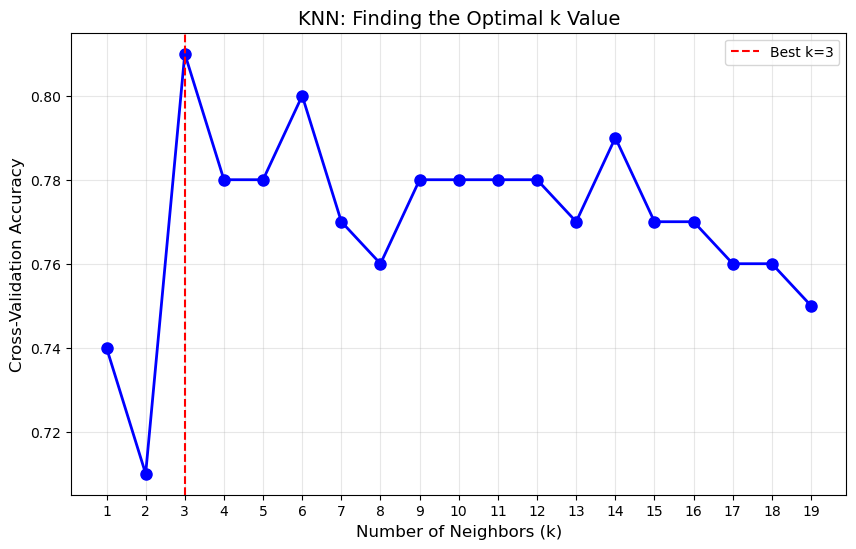

In [11]:
# Plot cross-validation scores vs k
plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores_list, 'bo-', linewidth=2, markersize=8)
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best k={best_k}')
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Cross-Validation Accuracy', fontsize=12)
plt.title('KNN: Finding the Optimal k Value', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(k_range)
plt.show()

---

## 9. KNN on Real Dataset: Fruit Classification

In [12]:
# Create sample fruit dataset (similar to previous lab)
np.random.seed(42)

# Generate synthetic fruit data
n_per_class = 15

# Apple (label 1): height ~7, width ~8
apples = np.column_stack([
    np.random.normal(7, 0.5, n_per_class),  # height
    np.random.normal(8, 0.5, n_per_class),  # width
])

# Mandarin (label 2): height ~5, width ~6
mandarins = np.column_stack([
    np.random.normal(5, 0.4, n_per_class),
    np.random.normal(6, 0.4, n_per_class),
])

# Orange (label 3): height ~7, width ~7
oranges = np.column_stack([
    np.random.normal(7, 0.4, n_per_class),
    np.random.normal(7, 0.4, n_per_class),
])

# Lemon (label 4): height ~9, width ~6
lemons = np.column_stack([
    np.random.normal(9, 0.5, n_per_class),
    np.random.normal(6, 0.4, n_per_class),
])

# Combine all
X_fruits = np.vstack([apples, mandarins, oranges, lemons])
y_fruits = np.array([1]*n_per_class + [2]*n_per_class + [3]*n_per_class + [4]*n_per_class)

fruit_names = {1: 'Apple', 2: 'Mandarin', 3: 'Orange', 4: 'Lemon'}

print(f"Dataset shape: {X_fruits.shape}")
print(f"Classes: {np.unique(y_fruits)}")

Dataset shape: (60, 2)
Classes: [1 2 3 4]


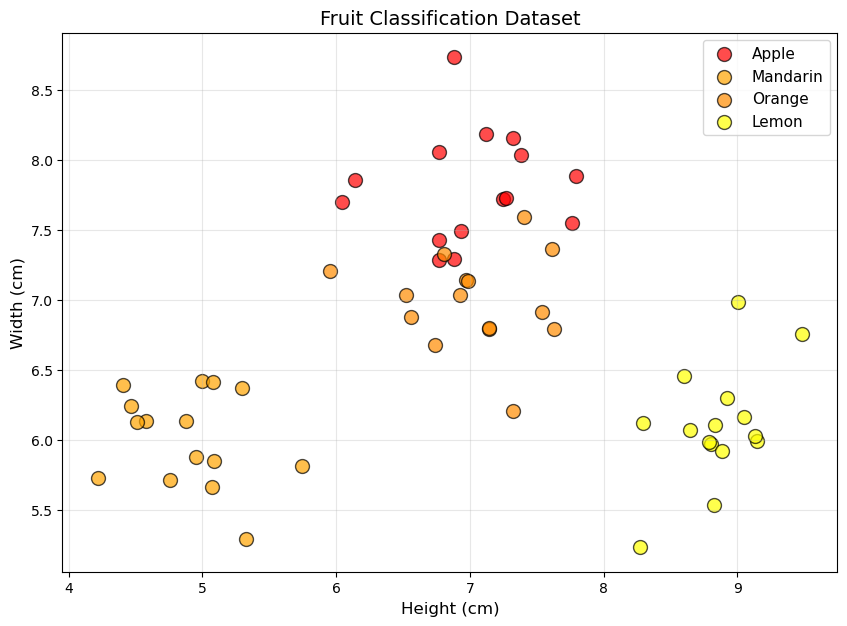

In [13]:
# Visualize the fruit data
plt.figure(figsize=(10, 7))

colors = ['red', 'orange', 'darkorange', 'yellow']

for label in np.unique(y_fruits):
    mask = y_fruits == label
    plt.scatter(
        X_fruits[mask, 0], 
        X_fruits[mask, 1],
        c=colors[label-1],
        label=fruit_names[label],
        s=100,
        edgecolors='black',
        alpha=0.7
    )

plt.xlabel('Height (cm)', fontsize=12)
plt.ylabel('Width (cm)', fontsize=12)
plt.title('Fruit Classification Dataset', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

In [14]:
# Split data and train KNN
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    X_fruits, y_fruits, test_size=0.25, random_state=0
)

# Find optimal k using cross-validation
k_range = range(1, 15)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_f, y_train_f, cv=5)
    cv_scores.append(scores.mean())

best_k = k_range[np.argmax(cv_scores)]
print(f"Best k from cross-validation: {best_k}")

Best k from cross-validation: 12


In [15]:
# Train final model with best k
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_f, y_train_f)

# Evaluate
train_acc = knn_final.score(X_train_f, y_train_f)
test_acc = knn_final.score(X_test_f, y_test_f)

print(f"\nFinal Model Evaluation (k={best_k}):")
print(f"Training accuracy: {train_acc:.2%}")
print(f"Test accuracy: {test_acc:.2%}")


Final Model Evaluation (k=12):
Training accuracy: 95.56%
Test accuracy: 80.00%


In [16]:
# Predict new samples
new_samples = np.array([
    [7.5, 8.0],  # Should be Apple
    [5.2, 5.8],  # Should be Mandarin
    [9.0, 6.2],  # Should be Lemon
])

predictions = knn_final.predict(new_samples)

print("\nPredictions for new samples:")
for i, (sample, pred) in enumerate(zip(new_samples, predictions)):
    print(f"  Sample {i+1} (height={sample[0]}, width={sample[1]}): {fruit_names[pred]}")


Predictions for new samples:
  Sample 1 (height=7.5, width=8.0): Apple
  Sample 2 (height=5.2, width=5.8): Mandarin
  Sample 3 (height=9.0, width=6.2): Lemon


---

## 10. Summary

### Key Takeaways

1. **KNN Algorithm**: Instance-based learning that predicts based on the k nearest neighbors

2. **Four Requirements**: Distance metric, number of neighbors (k), optional weighting, and aggregation method

3. **Bias-Variance Tradeoff**:
   - Small k → Low bias, high variance → Overfitting
   - Large k → High bias, low variance → Underfitting

4. **KNN for Both Tasks**: Works for classification (majority vote) and regression (average)

5. **Cross-Validation**: Use multiple train-test splits for more reliable evaluation

6. **Choosing k**: Use cross-validation to find the optimal k value

---

## 11. Practice Exercise

### Task

Using the KNN example from this lab:

1. Modify the code to test k values from 1 to 15
2. Report the accuracy for each k value
3. Determine which k value performs best

### Solution Template

In [17]:
# Exercise: Test different k values
print("K Value Analysis")
print("=" * 50)
print(f"{'K':^5} | {'Train Acc':^12} | {'Test Acc':^12}")
print("-" * 50)

best_k = 1
best_test_acc = 0

for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_f, y_train_f)
    
    train_acc = knn.score(X_train_f, y_train_f)
    test_acc = knn.score(X_test_f, y_test_f)
    
    print(f"{k:^5} | {train_acc:^12.2%} | {test_acc:^12.2%}")
    
    if test_acc > best_test_acc:
        best_test_acc = test_acc
        best_k = k

print("=" * 50)
print(f"\nBest k value: {best_k} with test accuracy: {best_test_acc:.2%}")

K Value Analysis
  K   |  Train Acc   |   Test Acc  
--------------------------------------------------
  1   |   100.00%    |    86.67%   
  2   |    95.56%    |    80.00%   
  3   |    95.56%    |    80.00%   
  4   |    95.56%    |    86.67%   
  5   |    93.33%    |    80.00%   
  6   |    93.33%    |    86.67%   
  7   |    95.56%    |    80.00%   
  8   |    93.33%    |    80.00%   
  9   |    93.33%    |    80.00%   
 10   |    95.56%    |    80.00%   
 11   |    95.56%    |    80.00%   
 12   |    95.56%    |    80.00%   
 13   |    95.56%    |    80.00%   
 14   |    95.56%    |    86.67%   
 15   |    95.56%    |    80.00%   

Best k value: 1 with test accuracy: 86.67%


---

## References

- scikit-learn Documentation: [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- scikit-learn Datasets: [https://scikit-learn.org/stable/datasets.html](https://scikit-learn.org/stable/datasets.html)